In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [9]:
x = np.linspace(0, 50, 50)
y = np.linspace(0, 50, 50)
n = len(x)

In [10]:
x += np.random.uniform(-4, 4, 50)
y += np.random.uniform(-4, 4, 50)

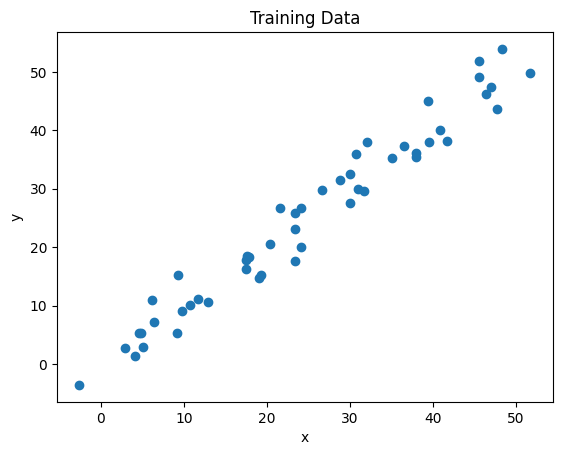

In [11]:
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title("Training Data")
plt.show()


In [13]:
tf.compat.v1.disable_eager_execution()
X = tf.compat.v1.placeholder(tf.float32)
Y = tf.compat.v1.placeholder(tf.float32)

W = tf.Variable(np.random.randn(), name='W')
b = tf.Variable(np.random.randn(), name='b')

learning_rate = 0.01
training_epochs = 1000

y_pred = tf.add(tf.multiply(X, W), b)

cost = tf.reduce_sum(tf.pow(y_pred-Y, 2)) / (2 * n)

optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate).minimize(cost)

init = tf.compat.v1.global_variables_initializer()

with tf.compat.v1.Session() as sess:
    sess.run(init)
    
    for epoch in range(training_epochs):
        for (_x, _y) in zip(x,y):
            sess.run(optimizer, feed_dict = {X : _x, Y: _y})
        
        if (epoch + 1) % 50 == 0:
            c = sess.run(cost, feed_dict = {X : x, Y : y})
            print("Epoch", (epoch + 1), ": cost =", c, "W =", sess.run(W), "b =", sess.run(b))
        
    training_cost = sess.run(cost, feed_dict ={X: x, Y: y})
    weight = sess.run(W)
    bias = sess.run(b)

Epoch 50 : cost = 6.563078 W = 1.0825843 b = -0.09590162
Epoch 100 : cost = 6.5095463 W = 1.0845215 b = -0.18844225
Epoch 150 : cost = 6.4636993 W = 1.0862658 b = -0.27176237
Epoch 200 : cost = 6.4243293 W = 1.0878364 b = -0.346781
Epoch 250 : cost = 6.3904243 W = 1.0892504 b = -0.4143249
Epoch 300 : cost = 6.3611484 W = 1.0905236 b = -0.47513935
Epoch 350 : cost = 6.3358006 W = 1.0916699 b = -0.5298952
Epoch 400 : cost = 6.313802 W = 1.0927019 b = -0.57919365
Epoch 450 : cost = 6.294661 W = 1.0936311 b = -0.6235815
Epoch 500 : cost = 6.2779703 W = 1.0944679 b = -0.66354626
Epoch 550 : cost = 6.2633805 W = 1.0952212 b = -0.6995292
Epoch 600 : cost = 6.250596 W = 1.0958995 b = -0.7319282
Epoch 650 : cost = 6.2393746 W = 1.09651 b = -0.7610977
Epoch 700 : cost = 6.2295074 W = 1.09706 b = -0.78736264
Epoch 750 : cost = 6.220812 W = 1.097555 b = -0.8110102
Epoch 800 : cost = 6.213131 W = 1.0980008 b = -0.8323039
Epoch 850 : cost = 6.206348 W = 1.0984021 b = -0.8514726
Epoch 900 : cost = 6.

In [14]:
predictions = weight * x + bias
print("Training cost =", training_cost, "Weight =", weight, "bias =", bias, '\n')

Training cost = 6.190268 Weight = 1.0993817 bias = -0.8982645 



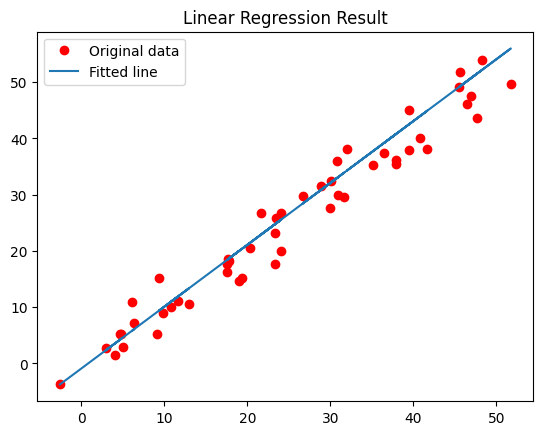

In [15]:
plt.plot(x, y, 'ro', label ='Original data')
plt.plot(x, predictions, label ='Fitted line')
plt.title('Linear Regression Result')
plt.legend()
plt.show()